
<a id='0'></a>

# Used Cars Dataset: EDA + Feature Engineering + Modelling 


Craigslist is the world's largest collection of used vehicles for sale. 

This is a dataset from Kaggle which includes every used vehicle entry within the United States on Craigslist.This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price,condition,manufacturer,latitude/longitude,and other categories. 

Link of the dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data


## Table of Contents


The table of contents for this project is as follows:-

1. [The problem statement](#1)
1. [Import libraries](#2)
1. [Import dataset](#3)
1. [Exploratory data analysis](#4)
    -  [Univariate Analysis](#4.1)
    -  [Bivariate Analysis](#4.2)
    -  [Multivariate Analysis](#4.3)
1. [Declare feature vector and target variable](#5)
1. [Split data into training and test set](#6)
1. [Feature Engineering](#7)
1. [Feature Selection and Feature Scaling](#8)
1. [Model training](#9)
1. [Predict results and check the score](#10)
1. [k-fold Cross Validation](#11)
1. [Results and Conclusion](#12)


## 1. The problem statement <a class="anchor" id="1"></a>

In this kernel, I will try to predict the used cars price based on the original used cars dataset. So, let's get started.


## 2. Import libraries <a class="anchor" id="2"></a>


The first step in building the model is to import the necessary libraries.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import warnings

warnings.filterwarnings('ignore')

## 3. Import dataset <a class="anchor" id="3"></a>


The next step is to import the dataset.

In [3]:
df = pd.read_csv('dataset/vehicles.csv',index_col='Unnamed: 0')

## 4. Exploratory data analysis <a class="anchor" id="4"></a>


- We have imported the data. 

- Now, its time to explore the data to gain insights about it. 

### View dimensions of dataset 

In [4]:
df.shape

(458213, 25)

We can see that there are 458213 instances and 25 variables in the data set.

### Preview the dataset

In [5]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


### View column names 

In [6]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

### View summary of dataset 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458213 entries, 0 to 458212
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   url           458213 non-null  object 
 2   region        458213 non-null  object 
 3   region_url    458213 non-null  object 
 4   price         458213 non-null  int64  
 5   year          457163 non-null  float64
 6   manufacturer  439993 non-null  object 
 7   model         453367 non-null  object 
 8   condition     265273 non-null  object 
 9   cylinders     287073 non-null  object 
 10  fuel          454976 non-null  object 
 11  odometer      402910 non-null  float64
 12  title_status  455636 non-null  object 
 13  transmission  455771 non-null  object 
 14  VIN           270664 non-null  object 
 15  drive         324025 non-null  object 
 16  size          136865 non-null  object 
 17  type          345475 non-null  object 
 18  pain

#### Comment

- We can see that the dataset contains mixture of categorical and numerical variables.

- Categorical variables have data type `object`.

- Numerical variables have data type `float64`.

- Also, there are some missing values in the dataset. We will explore it later.

### View statistical properties of dataset

In [8]:
df.describe()

,id,price,year,odometer,lat,long
count,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


## 4.1. Univariate Analysis <a class="anchor" id="4.1"></a>

### Explore `price` target variable 

#### Check for missing values

In [9]:
df['price'].isnull().sum()

0

We can see that there are no missing values in the target variable.

#### View statistical properties of values

In [10]:
df['price'].describe()

count    4.582130e+05
mean     4.042093e+04
std      8.194599e+06
min      0.000000e+00
25%      4.900000e+03
50%      1.099500e+04
75%      2.149500e+04
max      3.615215e+09
Name: price, dtype: float64

#### View the distribution of values

<AxesSubplot:xlabel='price'>

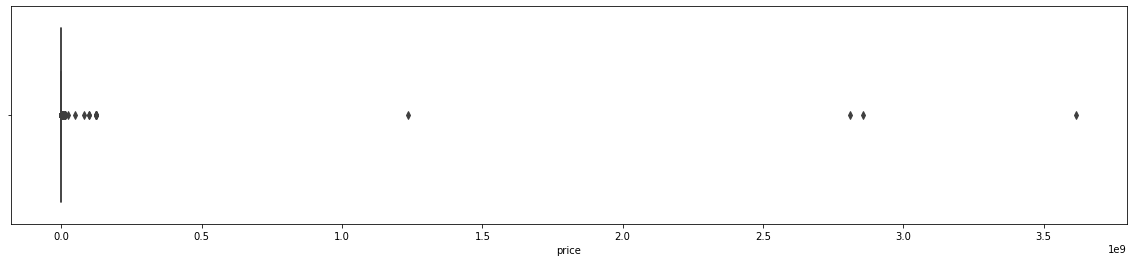

In [11]:
plt.figure(figsize=(20, 4))
sns.boxplot(x='price',data=df)

#### Comment

- We can see that there are many outliers in this column.

## 4.2. Bivariate Analysis <a class="anchor" id="4.2"></a>

### Types of variables 


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.


First of all, I will find categorical variables.

### Explore Categorical Variables

In [12]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('Numbers of Categorical variables: ',len(categorical))

print('\nThe categorical variables are:', categorical)

Numbers of Categorical variables:  19

The categorical variables are: ['url', 'region', 'region_url', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'state', 'posting_date']


In [13]:
# view the categorical variables

df[categorical].head()

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,chevrolet,corvette grand sport,good,8 cylinders,gas,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,hyundai,sonata,excellent,4 cylinders,gas,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,2020-12-02T02:11:50-0600
2,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,bmw,x3 3.0i,good,6 cylinders,gas,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,2020-12-01T19:50:41-0600
3,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,chevrolet,c-10,good,4 cylinders,gas,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,2020-12-01T15:54:45-0600
4,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,ford,f350 lariat,excellent,8 cylinders,diesel,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,2020-12-01T12:53:56-0600


### Summary of categorical variables 


- There is a date variable. It is denoted by `posting_date` column.


- There are 19 categorical variables.


- There are 3 variables containing url information.


### Explore problems within categorical variables 


First, I will explore the categorical variables.


#### Missing values in categorical variables

In [14]:
# check missing values in categorical variables
df_eda = pd.DataFrame([df.isnull().sum(),df.isnull().sum()/len(df)*100],
                      index=['Number of NA', 'Percentage of NA (%)']).T

df_eda.sort_values("Number of NA",ascending=False)

,Number of NA,Percentage of NA (%)
size,321348.0,70.130703
condition,192940.0,42.107055
VIN,187549.0,40.930528
cylinders,171140.0,37.349442
paint_color,140843.0,30.737452
drive,134188.0,29.285070
type,112738.0,24.603841
odometer,55303.0,12.069278
manufacturer,18220.0,3.976317
lat,7448.0,1.625445


<AxesSubplot:>

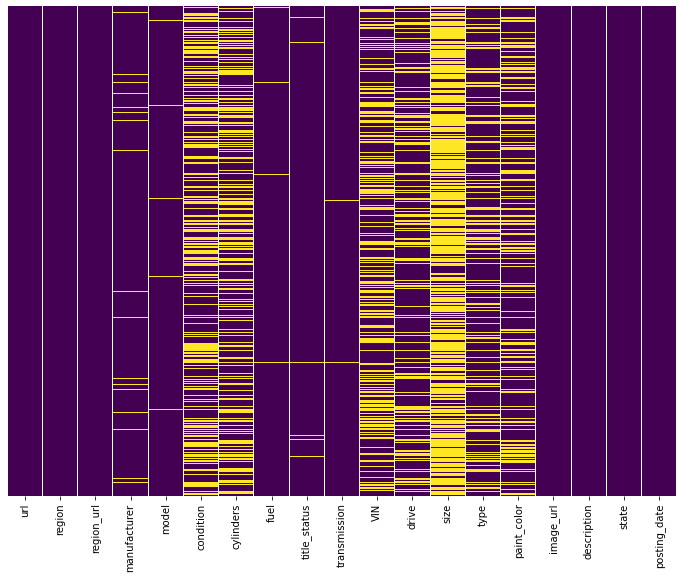

In [15]:
# plot the missing value using heatmap
plt.figure(figsize=(12,9))
sns.heatmap(df[categorical].isna(),yticklabels=False,cbar=False,cmap='viridis')

We can see that there are 15 categorical variables in the dataset which contains missing values.

Several variables contain a large scale of missing values, such as condition, cylinders and size.

#### Frequency count of categorical variables


Now, I will check the frequency counts of categorical variables.

In [16]:
# view frequency of categorical variables except for url features
for var in categorical:
    print(df[var].value_counts().iloc[np.r_[0:3, -3:0]],'\n')

https://sanantonio.craigslist.org/cto/d/bulverde-2011-f150-fx2-ecoboost/7239767521.html     1
https://fargo.craigslist.org/ctd/d/waite-park-2014-gmc-savana-cargo-van/7237669917.html     1
https://pittsburgh.craigslist.org/cto/d/pittsburgh-honda-accord-2007/7230677051.html        1
https://bozeman.craigslist.org/cto/d/bozeman-dodge-ram-hemi-64/7239367685.html              1
https://medford.craigslist.org/ctd/d/medford-2008-mazda-cx9-3rd-seat-awd/7226510572.html    1
https://kpr.craigslist.org/ctd/d/spokane-2017-ford-f150-150-150-lariat/7234737231.html      1
Name: url, dtype: int64 

columbus               3818
rochester              3592
jacksonville           3504
west virginia (old)      11
fort smith, AR           11
sioux city, IA            1
Name: region, dtype: int64 

https://bend.craigslist.org          2989
https://fresno.craigslist.org        2988
https://spokane.craigslist.org       2988
https://siskiyou.craigslist.org        28
https://susanville.craigslist.org      17
htt

2020-11-22T06:14:19-0500    7
2020-12-02T07:50:07-0600    7
2020-11-28T10:30:29-0500    6
2020-11-25T11:24:35-0500    1
2020-11-30T12:16:24-0600    1
2020-12-02T14:51:11-0800    1
Name: posting_date, dtype: int64 



In [17]:
# view frequency distribution of categorical variables

for var in categorical: 
    print(var,'\n',(df[var].value_counts()/np.float(len(df))).iloc[np.r_[0:3, -3:0]],'\n')

url 
 https://sanantonio.craigslist.org/cto/d/bulverde-2011-f150-fx2-ecoboost/7239767521.html     0.000002
https://fargo.craigslist.org/ctd/d/waite-park-2014-gmc-savana-cargo-van/7237669917.html     0.000002
https://pittsburgh.craigslist.org/cto/d/pittsburgh-honda-accord-2007/7230677051.html        0.000002
https://bozeman.craigslist.org/cto/d/bozeman-dodge-ram-hemi-64/7239367685.html              0.000002
https://medford.craigslist.org/ctd/d/medford-2008-mazda-cx9-3rd-seat-awd/7226510572.html    0.000002
https://kpr.craigslist.org/ctd/d/spokane-2017-ford-f150-150-150-lariat/7234737231.html      0.000002
Name: url, dtype: float64 

region 
 columbus               0.008332
rochester              0.007839
jacksonville           0.007647
west virginia (old)    0.000024
fort smith, AR         0.000024
sioux city, IA         0.000002
Name: region, dtype: float64 

region_url 
 https://bend.craigslist.org          0.006523
https://fresno.craigslist.org        0.006521
https://spokane.craigsl

posting_date 
 2020-11-22T06:14:19-0500    0.000015
2020-12-02T07:50:07-0600    0.000015
2020-11-28T10:30:29-0500    0.000013
2020-11-25T11:24:35-0500    0.000002
2020-11-30T12:16:24-0600    0.000002
2020-12-02T14:51:11-0800    0.000002
Name: posting_date, dtype: float64 



#### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [18]:
# check for cardinality in categorical variables

for var in categorical:
    print(var, 'contains', len(df[var].unique()), 'labels')

url contains 458213 labels
region contains 405 labels
region_url contains 413 labels
manufacturer contains 44 labels
model contains 31521 labels
condition contains 7 labels
cylinders contains 9 labels
fuel contains 6 labels
title_status contains 7 labels
transmission contains 4 labels
VIN contains 133621 labels
drive contains 4 labels
size contains 5 labels
type contains 14 labels
paint_color contains 13 labels
image_url contains 285405 labels
description contains 384348 labels
state contains 51 labels
posting_date contains 423806 labels


We can see that there is a `Date` variable which needs to be preprocessed. I will do preprocessing in the following section.


All the other variables contain relatively smaller number of variables.

#### Feature Engineering of Date Variable

In [19]:
df['posting_date'].dtypes

dtype('O')

In [20]:
df['posting_date'].head()

0    2020-12-02T08:11:30-0600
1    2020-12-02T02:11:50-0600
2    2020-12-01T19:50:41-0600
3    2020-12-01T15:54:45-0600
4    2020-12-01T12:53:56-0600
Name: posting_date, dtype: object

We can see that the data type of this variable is object. I will parse the date currently coded as object into datetime format.

In [21]:
# parse the dates, currently coded as strings, into datetime format
df['posting_date'] = pd.to_datetime(df['posting_date'],utc=True,errors='coerce')

In [22]:
# extract date from date
df['Date'] = df['posting_date'].dt.date

# extract year from date
df['Year'] = df['posting_date'].dt.year

# extract quarter from date
df['Quarter'] = df['posting_date'].dt.quarter

# extract month from date
df['Month'] = df['posting_date'].dt.month

# extract day from date
df['Day'] = df['posting_date'].dt.day

# extract day of week from date
df['Dayofweek'] = df['posting_date'].dt.dayofweek

# extract hour from date
df['Hour'] = df['posting_date'].dt.hour

In [23]:
# show the time features

time_feature = ['Date','Year','Quarter','Month','Day','Dayofweek','Hour']

for feature in time_feature:
    print(feature,'\n',df[feature].unique(),'\n')

Date 
 [datetime.date(2020, 12, 2) datetime.date(2020, 12, 1)
 datetime.date(2020, 11, 30) datetime.date(2020, 11, 29)
 datetime.date(2020, 11, 28) datetime.date(2020, 11, 27)
 datetime.date(2020, 11, 26) datetime.date(2020, 11, 25)
 datetime.date(2020, 11, 24) datetime.date(2020, 11, 23)
 datetime.date(2020, 11, 22) datetime.date(2020, 11, 21)
 datetime.date(2020, 11, 20) datetime.date(2020, 11, 19)
 datetime.date(2020, 11, 18) datetime.date(2020, 11, 17)
 datetime.date(2020, 11, 16) datetime.date(2020, 11, 15)
 datetime.date(2020, 11, 14) datetime.date(2020, 11, 13)
 datetime.date(2020, 11, 12) datetime.date(2020, 11, 11)
 datetime.date(2020, 11, 10) datetime.date(2020, 11, 9)
 datetime.date(2020, 11, 8) datetime.date(2020, 11, 7)
 datetime.date(2020, 11, 6) datetime.date(2020, 11, 5)
 datetime.date(2020, 11, 4) datetime.date(2020, 11, 3) NaT
 datetime.date(2020, 12, 3) datetime.date(2020, 10, 28)
 datetime.date(2020, 10, 23)] 

Year 
 [2020.   nan] 

Quarter 
 [ 4. nan] 

Month 
 [1

We can see that the values of feature Year and Quarter only has one variable. 

We should drop this useless feature and the original posting_date column.

In [24]:
df.drop(labels=['posting_date','Year','Quarter'],axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458213 entries, 0 to 458212
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   url           458213 non-null  object 
 2   region        458213 non-null  object 
 3   region_url    458213 non-null  object 
 4   price         458213 non-null  int64  
 5   year          457163 non-null  float64
 6   manufacturer  439993 non-null  object 
 7   model         453367 non-null  object 
 8   condition     265273 non-null  object 
 9   cylinders     287073 non-null  object 
 10  fuel          454976 non-null  object 
 11  odometer      402910 non-null  float64
 12  title_status  455636 non-null  object 
 13  transmission  455771 non-null  object 
 14  VIN           270664 non-null  object 
 15  drive         324025 non-null  object 
 16  size          136865 non-null  object 
 17  type          345475 non-null  object 
 18  pain

In [26]:
# preview the dataset again

df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,image_url,description,state,lat,long,Date,Month,Day,Dayofweek,Hour
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,...,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02,12.0,2.0,2.0,14.0
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,...,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02,12.0,2.0,2.0,8.0
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,...,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-02,12.0,2.0,2.0,1.0
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,...,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01,12.0,1.0,1.0,21.0
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,...,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01,12.0,1.0,1.0,18.0


### Explore Numerical Variables 

In [27]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 10 numerical variables

The numerical variables are : ['id', 'price', 'year', 'odometer', 'lat', 'long', 'Month', 'Day', 'Dayofweek', 'Hour']


In [28]:
# view the numerical variables
df[numerical].head()

,id,price,year,odometer,lat,long,Month,Day,Dayofweek,Hour
0,7240372487,35990,2010.0,32742.0,32.590000,-85.480000,12.0,2.0,2.0,14.0
1,7240309422,7500,2014.0,93600.0,32.547500,-85.468200,12.0,2.0,2.0,8.0
2,7240224296,4900,2006.0,87046.0,32.616807,-85.464149,12.0,2.0,2.0,1.0
3,7240103965,2000,1974.0,190000.0,32.861600,-85.216100,12.0,1.0,1.0,21.0
4,7239983776,19500,2005.0,116000.0,32.547500,-85.468200,12.0,1.0,1.0,18.0


### Explore problems within numerical variables


Now, I will explore the numerical variables.


### Missing values in numerical variables

In [29]:
# check missing values in numerical variables

df_eda = pd.DataFrame([df.isnull().sum(),
                       df.isnull().sum()/len(df)*100],
                       index=['Number of NA', 'Percentage of NA (%)']).T

df_eda.sort_values('Number of NA',ascending=False)

,Number of NA,Percentage of NA (%)
size,321348.0,70.130703
condition,192940.0,42.107055
VIN,187549.0,40.930528
cylinders,171140.0,37.349442
paint_color,140843.0,30.737452
drive,134188.0,29.285070
type,112738.0,24.603841
odometer,55303.0,12.069278
manufacturer,18220.0,3.976317
long,7448.0,1.625445


<AxesSubplot:>

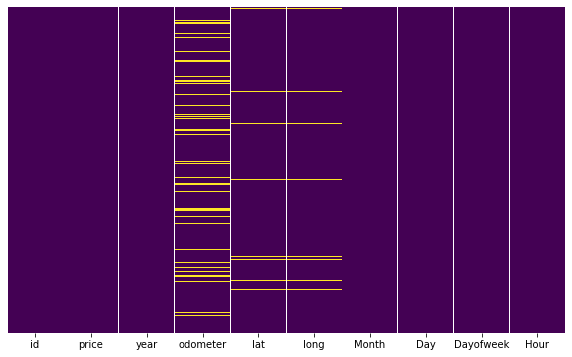

In [30]:
# plot the missing value using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical].isna(),yticklabels=False,cbar=False,cmap='viridis')

We can see that 9 numerical variables contain missing values.

28 rows lack the information of date and time, 7448 rows lack the information of size.

### Outliers in numerical variables

In [31]:
# view summary statistics in numerical variables
round(df[numerical].describe(),1)

,id,price,year,odometer,lat,long,Month,Day,Dayofweek,Hour
count,4.582130e+05,4.582130e+05,457163.0,4.029100e+05,450765.0,450765.0,458185.0,458185.0,458185.0,458185.0
mean,7.235233e+09,4.042090e+04,2010.7,1.016698e+05,38.5,-94.4,11.2,15.8,2.7,15.1
std,4.594362e+06,8.194599e+06,8.9,3.228622e+06,5.9,18.1,0.4,10.1,1.9,6.3
min,7.208550e+09,0.000000e+00,1900.0,0.000000e+00,-82.6,-164.1,10.0,1.0,0.0,0.0
25%,7.231953e+09,4.900000e+03,2008.0,4.087700e+04,34.6,-110.9,11.0,5.0,1.0,14.0
50%,7.236409e+09,1.099500e+04,2013.0,8.764100e+04,39.2,-88.3,11.0,17.0,2.0,16.0
75%,7.239321e+09,2.149500e+04,2016.0,1.340000e+05,42.5,-81.0,11.0,25.0,4.0,19.0
max,7.241019e+09,3.615215e+09,2021.0,2.043756e+09,82.0,150.9,12.0,30.0,6.0,23.0


On closer inspection, we can see that the `odometer`, `lat`, `long` and `price` columns may contain outliers.


I will draw boxplots to visualise outliers in the above variables. 

Text(0, 0.5, 'price')

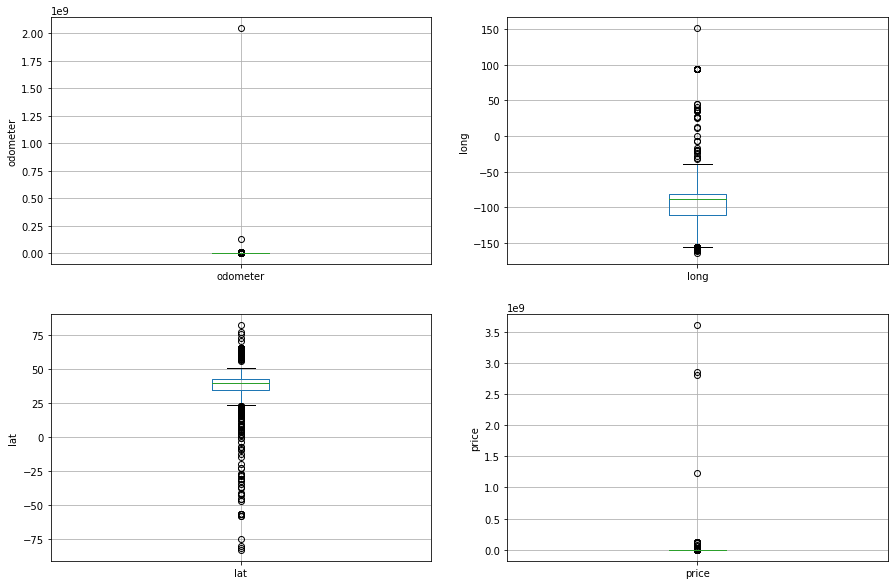

In [32]:
# draw boxplots to visualize outliers
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='odometer')
fig.set_title('')
fig.set_ylabel('odometer')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='long')
fig.set_title('')
fig.set_ylabel('long')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='lat')
fig.set_title('')
fig.set_ylabel('lat')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='price')
fig.set_title('')
fig.set_ylabel('price')

The above boxplots confirm that there are lot of outliers in these variables.

## 4.3. Multivariate Analysis <a class="anchor" id="4.3"></a>


- An important step in EDA is to discover patterns and relationships between variables in the dataset.

In [33]:
correlation = df.corr()

[Text(0, 0.5, 'id'),
 Text(0, 1.5, 'price'),
 Text(0, 2.5, 'year'),
 Text(0, 3.5, 'odometer'),
 Text(0, 4.5, 'lat'),
 Text(0, 5.5, 'long'),
 Text(0, 6.5, 'Month'),
 Text(0, 7.5, 'Day'),
 Text(0, 8.5, 'Dayofweek'),
 Text(0, 9.5, 'Hour')]

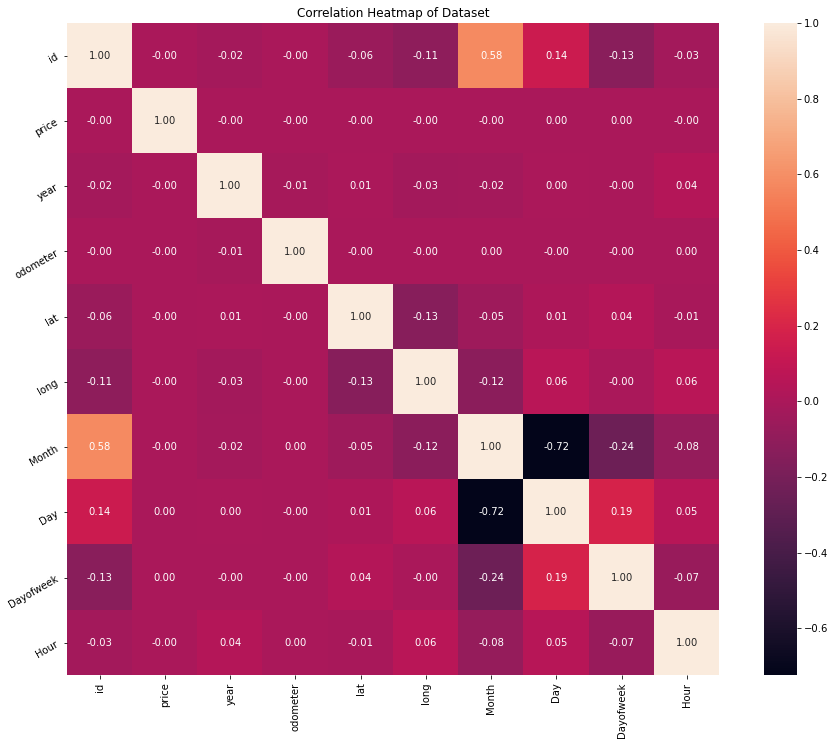

In [34]:
# draw a heat map to show the correlations between features

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Dataset')

ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           

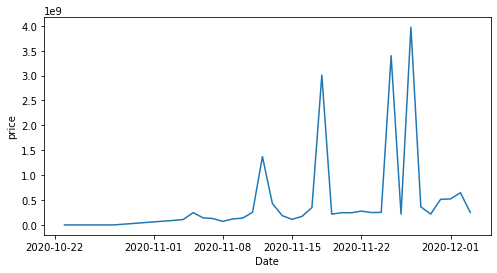

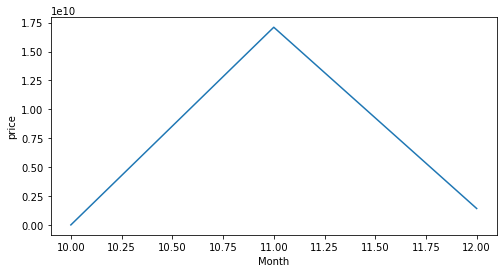

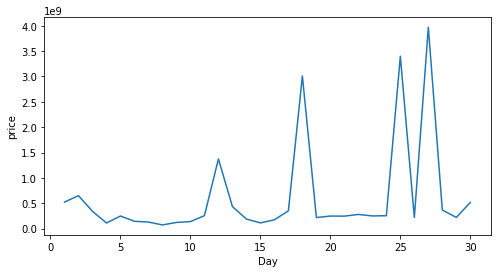

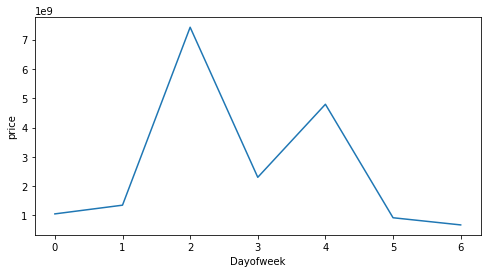

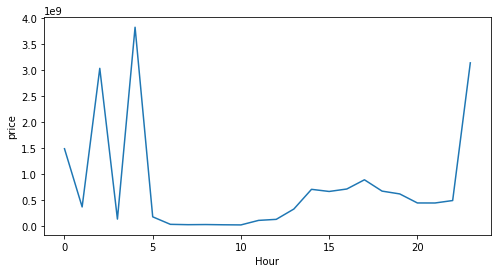

In [35]:
# plot the sales per year,month,day,day of week and hour
time_feature = ['Date', 'Month', 'Day', 'Dayofweek', 'Hour']

for feature in time_feature:
    price_per_time = df.groupby(feature, as_index=False).price.sum()
    plt.figure(figsize=(8,4))
    sns.lineplot(x=feature, y="price", data=price_per_time)

Text(0.5, 1.0, 'State Price')

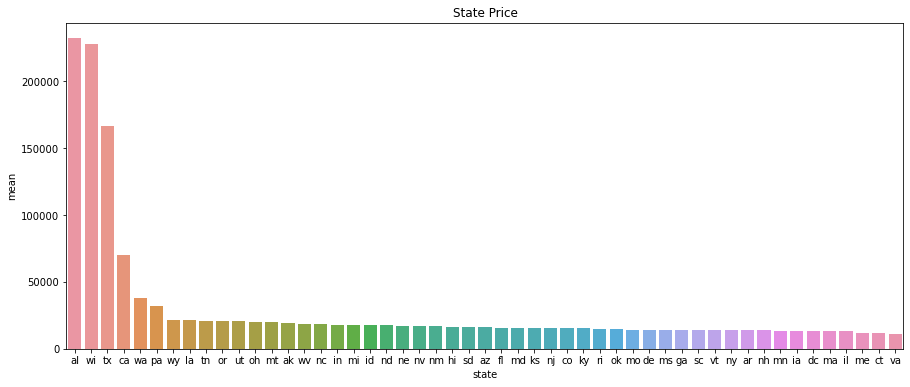

In [36]:
# show the mean price of each state
price_per_state = df.groupby('state',as_index=False).agg({'price': ['mean']})
price_per_state.columns = ['state', 'mean']
price_per_state = price_per_state.sort_values(by='mean', ascending=False)

# plot the categories with mean price
plt.figure(figsize=(15,6))
ax = sns.barplot(y="mean", x="state", data=price_per_state)
ax.set_title('State Price')

<AxesSubplot:xlabel='price', ylabel='manufacturer'>

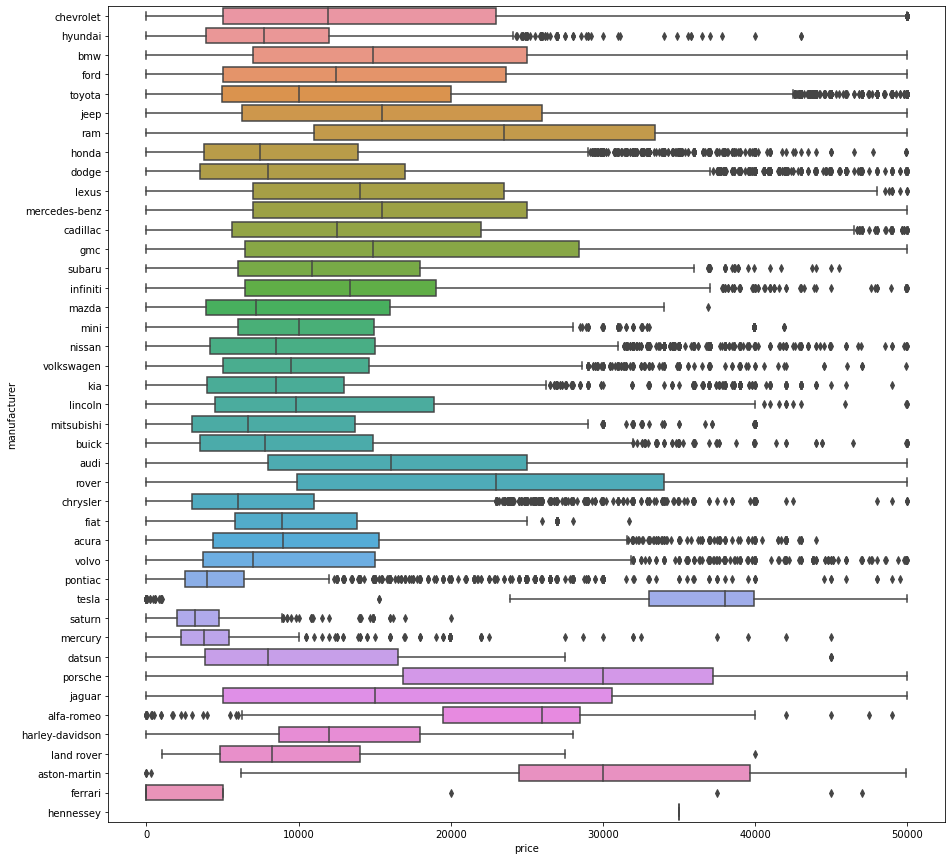

In [37]:
# show the price distribution of each manufacturer
plt.figure(figsize=(15,15))
sns.boxplot(x='price',y='manufacturer',data=df[df['price']<=0.005e+7])

Text(0.5, 1.0, 'Condition Price')

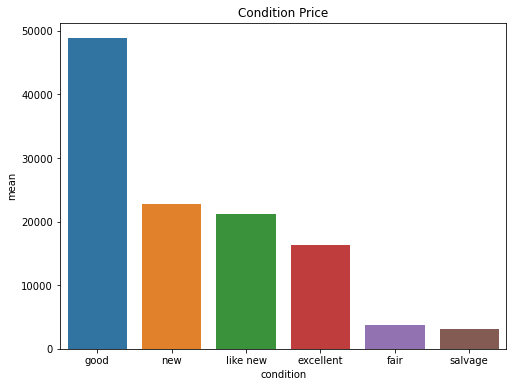

In [38]:
# show the mean price of each condition
price_per_condition = df.groupby('condition',as_index=False).agg({'price': ['mean']})
price_per_condition.columns = ['condition', 'mean']
price_per_condition = price_per_condition.sort_values(by='mean', ascending=False)

# plot the categories with mean price
plt.figure(figsize=(8,6))
ax = sns.barplot(y="mean", x="condition", data=price_per_condition)
ax.set_title('Condition Price')

#### Interpretation



From the above correlation heat map, we can conclude that :-

-  Day and Month variables are highly negatively correlated (correlation coefficient = -0.72).
-  The price is obviously higher in state al, wi and tx.
-  The price is higher on weekdays and at midnight.
-  Good and newer used cars have higher price.
-  Cars of aston-martin and tesla are obviously expensiver than cars like satum,hyundai and mercury.

## 5. Declare feature vector and target variable <a class="anchor" id="5"></a>

Choose only 10% of the dataset to build the model.

In [39]:
df1 = df.sample(frac=0.05, replace=False, random_state=101, axis=0)

In [40]:
X = df1.drop(['price'], axis=1)

y = df1['price']

Drop some features which are not useful for the prediction.

In [41]:
X.drop(labels=['id', 'url','region_url','image_url','VIN','Date','description'],axis=1,inplace=True)

## 6. Split data into separate training and test set <a class="anchor" id="6"></a>

In [42]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [43]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((15350, 21), (7561, 21))

## 7. Feature Engineering <a class="anchor" id="7"></a>


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.

In [44]:
# check data types in X_train
X_train.dtypes

region           object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
lat             float64
long            float64
Month           float64
Day             float64
Dayofweek       float64
Hour            float64
dtype: object

In [45]:
# display categorical and numerical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

print('Categorical variables are: ', categorical, '\nNumerical variables are: ',numerical)

Categorical variables are:  ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state'] 
Numerical variables are:  ['year', 'odometer', 'lat', 'long', 'Month', 'Day', 'Dayofweek', 'Hour']


### Engineering missing values in numerical variables



In [46]:
# check missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

year           36
odometer     1887
lat           260
long          260
Month           0
Day             0
Dayofweek       0
Hour            0
dtype: int64

In [47]:
# check missing values in numerical variables in X_test
X_test[numerical].isnull().sum()

year          23
odometer     927
lat          114
long         114
Month          1
Day            1
Dayofweek      1
Hour           1
dtype: int64

In [48]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

year 0.0023
odometer 0.1229
lat 0.0169
long 0.0169


#### Assumption


Assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.


I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set, in order to avoid overfitting.

In [49]:
# impute missing values in X_train and X_test with respective column median in X_train

from feature_engine.imputation import MeanMedianImputer as MMI

imputer = MMI(imputation_method='median',variables=numerical)
imputer.fit(X_train)

# transform the datasets
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [50]:
# check the mean assigned to each variable
imputer.imputer_dict_

{'year': 2013.0,
 'odometer': 88000.0,
 'lat': 39.1435775,
 'long': -88.728009,
 'Month': 11.0,
 'Day': 17.0,
 'Dayofweek': 2.0,
 'Hour': 16.0}

In [51]:
# check again missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

year         0
odometer     0
lat          0
long         0
Month        0
Day          0
Dayofweek    0
Hour         0
dtype: int64

In [52]:
# check missing values in numerical variables in X_test
X_test[numerical].isnull().sum()

year         0
odometer     0
lat          0
long         0
Month        0
Day          0
Dayofweek    0
Hour         0
dtype: int64

Now, we can see that there are no missing values in the numerical columns of training and test set.

### Engineering missing values in categorical variables

In [53]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print('The percentage of missing data in',col,'is about: ', round(X_train[col].isnull().mean(),2)*100,'%.')

The percentage of missing data in manufacturer is about:  4.0 %.
The percentage of missing data in model is about:  1.0 %.
The percentage of missing data in condition is about:  42.0 %.
The percentage of missing data in cylinders is about:  37.0 %.
The percentage of missing data in fuel is about:  1.0 %.
The percentage of missing data in title_status is about:  1.0 %.
The percentage of missing data in transmission is about:  1.0 %.
The percentage of missing data in drive is about:  30.0 %.
The percentage of missing data in size is about:  71.0 %.
The percentage of missing data in type is about:  25.0 %.
The percentage of missing data in paint_color is about:  31.0 %.


For feature with large number of missing data, we should not ignore this information.

We can add an indicator to these features and impute the missing data with the most frequent category.

In [54]:
# add new category "unknown"

for col in ['condition','cylinders','size','drive','type','paint_color']:
    df[col].fillna('unknown',inplace=True)

In [55]:
from feature_engine.imputation import CategoricalImputer

imputer_cat = CategoricalImputer(imputation_method='frequent', 
                                 variables=categorical)

imputer_cat.fit(X_train)

# transform the dataset
X_train = imputer_cat.transform(X_train)
X_test = imputer_cat.transform(X_test)

As a final check, I will check for missing values in X_train and X_test.

In [56]:
# check missing values in X_train

X_train.isnull().sum()

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
Month           0
Day             0
Dayofweek       0
Hour            0
dtype: int64

In [57]:
# check missing values in X_test

X_test.isnull().sum()

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
Month           0
Day             0
Dayofweek       0
Hour            0
dtype: int64

We can see that there are no missing values in datasets X_train and X_test.

### Engineering outliers in numerical variables 

Some numerical columns contain outliers. We should remove the outliers to improve the algorithm performance.

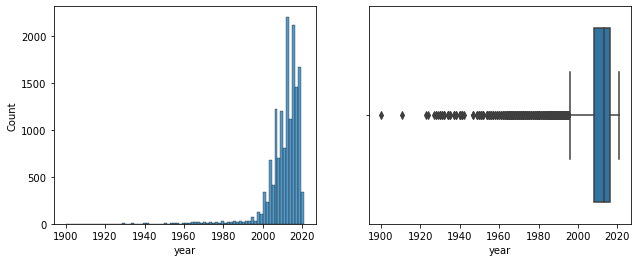

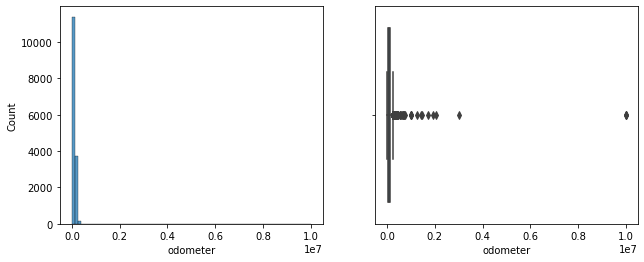

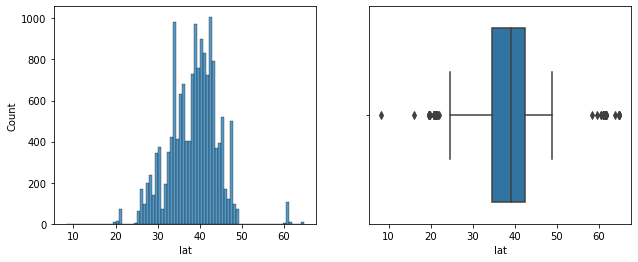

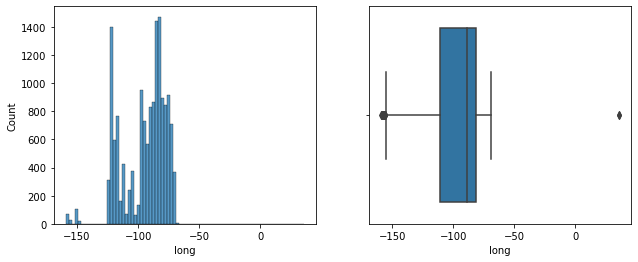

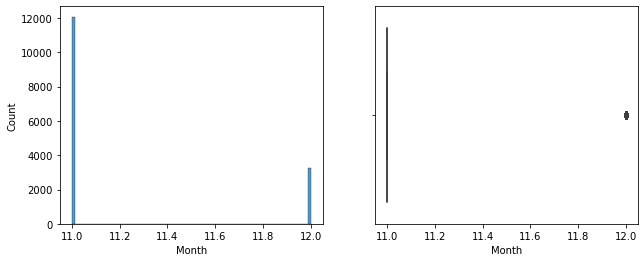

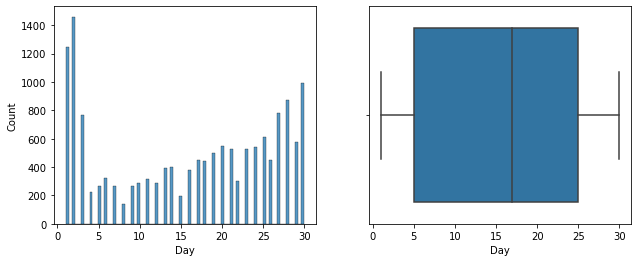

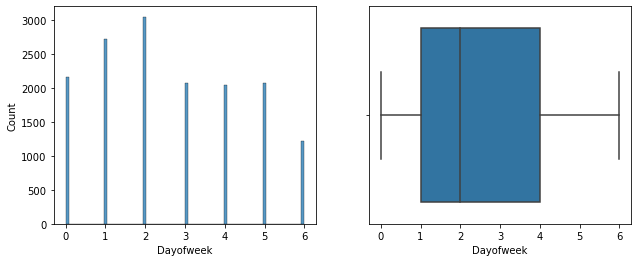

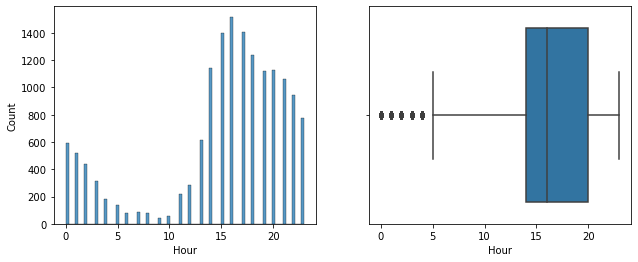

In [58]:
# show the distribution of each numerical features
for feature in numerical:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(x=feature,data=X_train,bins=80)
    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature,data=X_train)

Values of feature year are too large. We could do some encoding.

In [59]:
X_train['year'] = (2021-X_train['year']).astype(int)
X_test['year'] = (2021-X_test['year']).astype(int)

In [60]:
# import the library to remove the outliers
from feature_engine.outliers import Winsorizer

# create the capper
windsoriser_num = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=numerical)

In [61]:
windsoriser_num.fit(X_train)

X_train = windsoriser_num.transform(X_train)
X_test = windsoriser_num.transform(X_test)

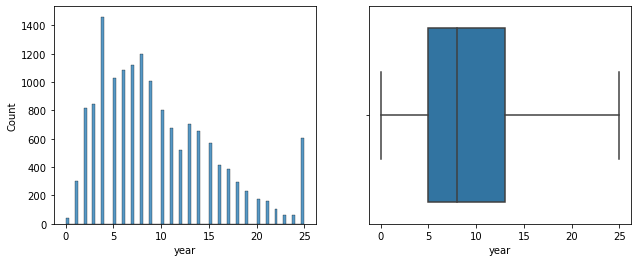

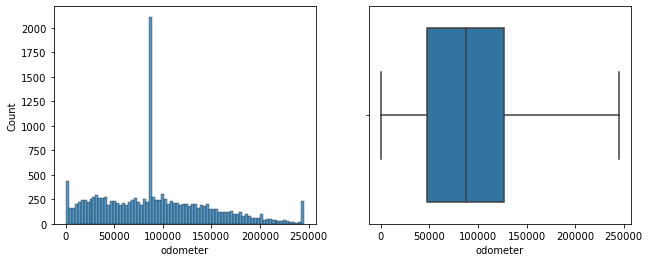

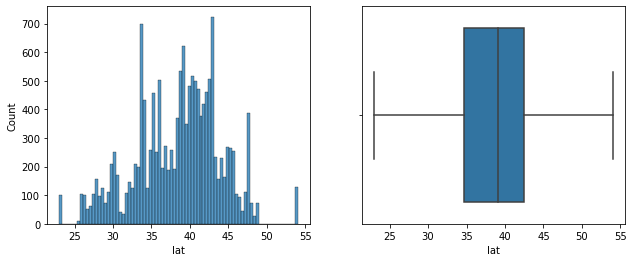

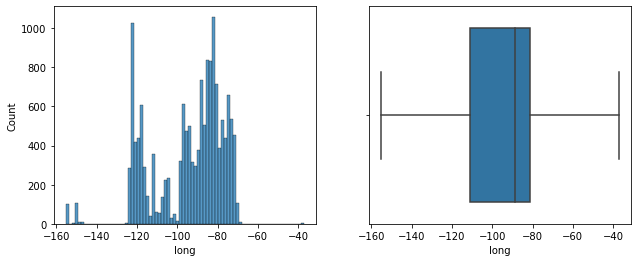

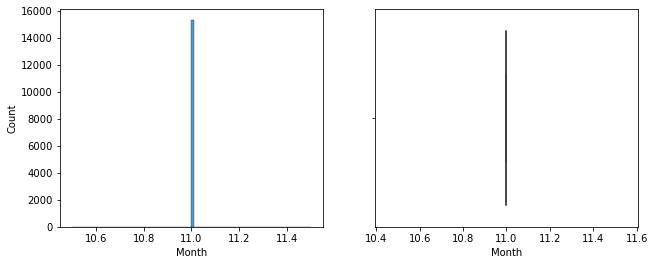

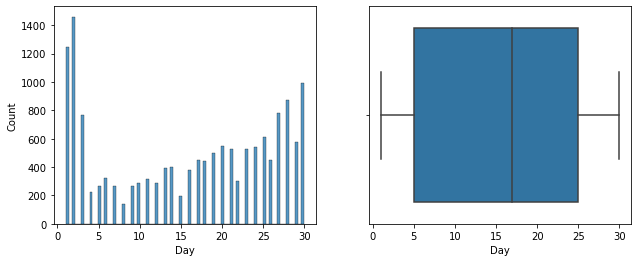

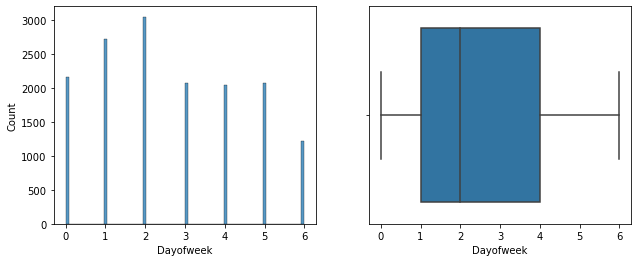

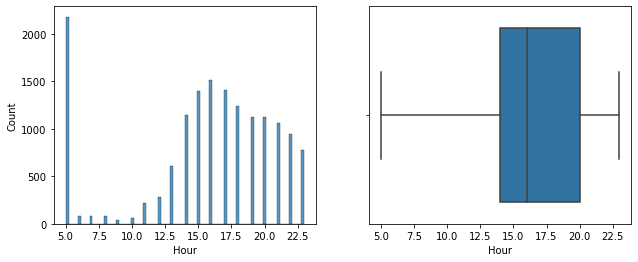

In [62]:
# show the distribution of each numerical features again
for feature in numerical:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(x=feature,data=X_train,bins=80)
    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature,data=X_train)

We can now see that the outliers in numerical variables are removed.

### Gaussian Transformation of numerical variables

Some machine learning models like linear and logistic regression assume that the variables are normally distributed. 
Transforming the variables to map their distribution to a Gaussian distribution may improve the performance of the machine learning algorithm.

In [63]:
from feature_engine.transformation import PowerTransformer as PTF

ptf = PTF(variables=numerical)
ptf.fit(X_train)

X_train = ptf.transform(X_train)
X_test = ptf.transform(X_test)

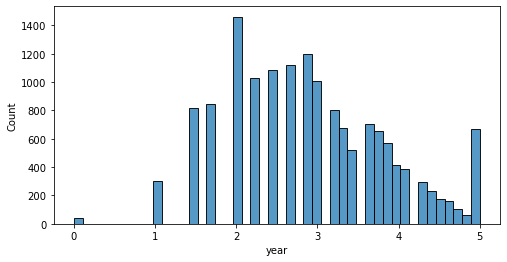

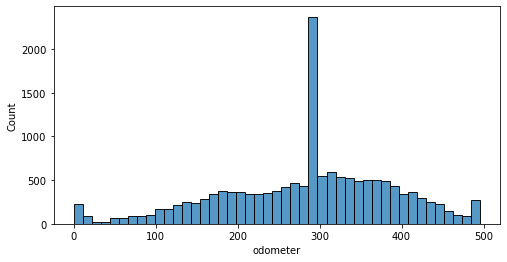

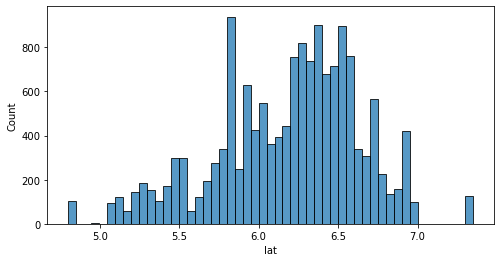

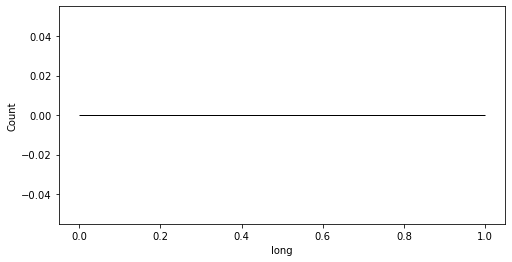

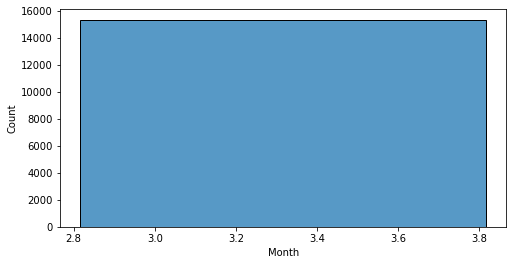

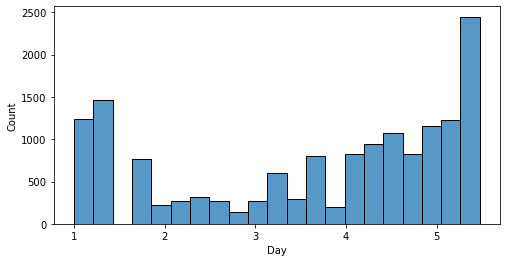

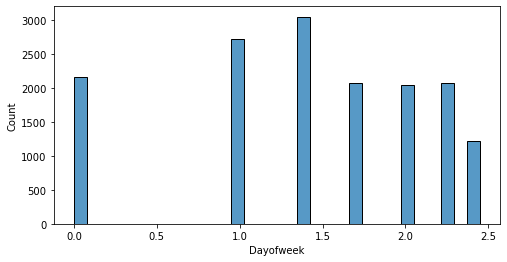

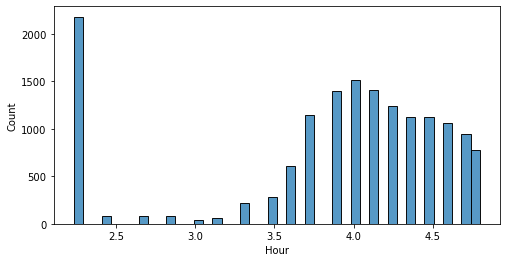

In [64]:
for var in numerical:
    plt.figure(figsize=(8,4))
    sns.histplot(X_train[var])

### Encode categorical variables 

In [65]:
# print categorical variables
categorical

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [66]:
X_train[categorical].head()

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
87111,daytona beach,ford,focus,excellent,4 cylinders,gas,clean,automatic,fwd,full-size,mini-van,green,fl
162653,"kansas city, MO",ford,f-150,good,6 cylinders,other,clean,automatic,4wd,full-size,sedan,white,ks
8275,anchorage / mat-su,ford,fusion,excellent,6 cylinders,gas,clean,automatic,4wd,full-size,sedan,purple,ak
361534,knoxville,chevrolet,city express,good,6 cylinders,gas,clean,automatic,4wd,full-size,other,white,tn
421586,yakima,mini,countryman base,good,6 cylinders,gas,clean,manual,fwd,full-size,sedan,white,wa


In [67]:
for feature in categorical:
    print(feature, X_train[feature].nunique(),'\n',
          (X_train[feature].value_counts()/len(X_train)).head(10),'\n')

region 402 
 columbus           0.008013
jacksonville       0.007883
san diego          0.007687
fresno / madera    0.007687
tucson             0.007622
sacramento         0.007622
springfield        0.007622
grand rapids       0.007557
cleveland          0.007492
rochester          0.007427
Name: region, dtype: float64 

manufacturer 40 
 ford         0.211792
chevrolet    0.143713
toyota       0.083779
honda        0.053616
nissan       0.051792
jeep         0.043844
gmc          0.039544
ram          0.037459
dodge        0.037459
hyundai      0.026775
Name: manufacturer, dtype: float64 

model 4346 
 f-150             0.027492
silverado 1500    0.012117
1500              0.009381
altima            0.008599
civic             0.007492
escape            0.007296
camry             0.007231
accord            0.007166
fusion            0.006515
silverado         0.006254
Name: model, dtype: float64 

condition 6 
 good         0.677134
excellent    0.251336
like new     0.052704
fair    

Encode the categories with only few percentage into new category "rare".

In [68]:
from feature_engine.encoding import RareLabelEncoder

rare_encoder1 = RareLabelEncoder(tol=0.005, n_categories=8,variables=['region','manufacturer','state','model'])

rare_encoder1.fit(X_train)

RareLabelEncoder(n_categories=8, tol=0.005,
                 variables=['region', 'manufacturer', 'state', 'model'])

In [69]:
# transform the dataset
X_train = rare_encoder1.transform(X_train)
X_test = rare_encoder1.transform(X_test)

Encode the rest features.

In [70]:
rare_encoder2 = RareLabelEncoder(tol=0.01, n_categories=3,
                                 variables=['cylinders','condition','title_status','size','type','paint_color','drive'])

rare_encoder2.fit(X_train)

# transform the dataset
X_train = rare_encoder2.transform(X_train)
X_test = rare_encoder2.transform(X_test)

Encode the categorical variables into numerical variables using one hot encoder and count encoder.

In [71]:
for c in categorical:
    print(c,X_train[c].nunique())

region 92
manufacturer 28
model 25
condition 5
cylinders 4
fuel 5
title_status 3
transmission 3
drive 3
size 4
type 12
paint_color 10
state 44


In [72]:
from feature_engine.encoding import OneHotEncoder,CountFrequencyEncoder

ohe_enc = OneHotEncoder(variables=['manufacturer','model','condition','cylinders',
                                   'fuel','title_status','transmission','drive',
                                   'size','type','paint_color'],drop_last=True)

ohe_enc.fit(X_train)

# transform the dataset
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [73]:
fre_enc = CountFrequencyEncoder(encoding_method='frequency',variables=['state','region'])

fre_enc.fit(X_train)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['state', 'region'])

In [74]:
# transform the dataset
X_train = fre_enc.transform(X_train)
X_test = fre_enc.transform(X_test)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. 

## 8. Feature Selection and Feature Scaling <a class="anchor" id="8"></a>

In [75]:
# find the columns with constant and quasi-constant feature
constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0]
print(constant_features)

# drop these columns
X_train.drop(labels=constant_features,axis=1,inplace=True)
X_test.drop(labels=constant_features,axis=1,inplace=True)

[]


In [76]:
# select coloumns with quasi_constant feature
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = 0.025)
sel.fit(X_train)

VarianceThreshold(threshold=0.025)

In [77]:
# print the number of quasi-constant features
quasi_constant = X_train.columns[~sel.get_support()]

len(quasi_constant),quasi_constant

X_train.drop(labels=quasi_constant,axis=1,inplace=True)
X_test.drop(labels=quasi_constant,axis=1,inplace=True)

In [78]:
# check for duplicated features in the training set

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40
50


0

In [79]:
# find and drop correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.9)
print('correlated features: ', len(set(corr_features)) )

# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

correlated features:  0


In [80]:
# use Wrapper model to select features
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),k_features=25,forward=True, 
          floating=False,verbose=2,scoring='r2')

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    2.4s finished

[2021-04-23 21:14:51] Features: 1/25 -- score: 0.09825024749285124[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.2s finished

[2021-04-23 21:14:53] Features: 2/25 -- score: 0.12810474301421482[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    2.3s finished

[2021-04-23 21:14:56] Features: 3/25 -- score: 0.14821020968090143[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [81]:
# show the feature we just selected
selected_feat = X_train.columns[list(sfs.k_feature_idx_)]

selected_feat

Index(['region', 'year', 'odometer', 'Day', 'manufacturer_bmw',
       'manufacturer_jeep', 'manufacturer_ram', 'manufacturer_gmc',
       'manufacturer_Rare', 'manufacturer_dodge', 'manufacturer_hyundai',
       'model_f-150', 'cylinders_4 cylinders', 'cylinders_6 cylinders',
       'cylinders_8 cylinders', 'fuel_other', 'fuel_diesel',
       'title_status_clean', 'drive_fwd', 'type_sedan', 'type_other',
       'type_pickup', 'type_truck', 'paint_color_white', 'paint_color_red'],
      dtype='object')

In [82]:
# transform the datasets
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

In [83]:
# data preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# create the capper to remove outliers in y datasets
windsoriser_target = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables='price')
windsoriser_target.fit(pd.DataFrame(y_train))

y_train = windsoriser_target.transform(pd.DataFrame(y_train))['price']
y_test = windsoriser_target.transform(pd.DataFrame(y_test))['price']

<AxesSubplot:xlabel='price'>

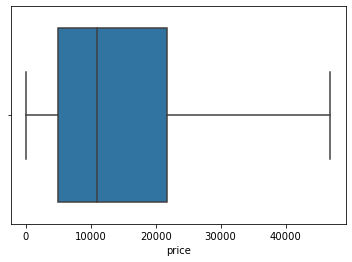

In [85]:
# check if there is still outlier

sns.boxplot(y_train)

## 9. Model training<a class="anchor" id="9"></a>

Now we are ready to train a model and predict the required solution. There are a large number of predictive modelling algorithms to choose from. 

First of all, we need to import the libraries of the algorithms.

In [86]:
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import lightgbm
import xgboost

Build model baseline.

In [87]:
# Linear Regression
linreg = LinearRegression()

# LinearSVR
lsvr = LinearSVR()

# RidgeCV
rcv = RidgeCV()

# DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# RandomForestRegressor
rfr = RandomForestRegressor()

# GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# MLPRegressor
mlpr = MLPRegressor()

# lightgbm
lg = lightgbm.LGBMRegressor()

# xgboost 
xgb = xgboost.XGBRegressor()

In [88]:
# Linear Regression
linreg.fit(X_train,y_train)

LinearRegression()

In [89]:
# RidgeCV
rcv.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [90]:
# DecisionTreeRegressor
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [91]:
# Linear SVR
lsvr.fit(X_train,y_train)

LinearSVR()

In [92]:
# MLPRegressor
mlpr.fit(X_train,y_train)

MLPRegressor()

In [93]:
# lightgbm
lg.fit(X_train,y_train)

LGBMRegressor()

In [94]:
# RandomForestRegressor
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [95]:
# GradientBoostingRegressor
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [96]:
# XGBoost
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## 10. Predict results and check the score <a class="anchor" id="10"></a>

In [97]:
from sklearn import metrics

def model_error(pred):
    print('R2 Score:',metrics.r2_score(y_test,pred))
    print('MAE:', metrics.mean_absolute_error(y_test, pred))
    print('RMSE:', metrics.mean_squared_error(y_test, pred,squared=False))

Now we redict the price and print the score.

R2 Score: 0.4352918141311597
MAE: 6466.262517179603
RMSE: 9316.820784744568


Text(0.5, 1.0, 'Linear Regression')

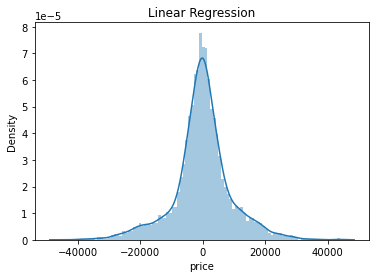

In [98]:
# Linear Regression
pred_linreg = linreg.predict(X_test)

model_error(pred_linreg)

sns.distplot((y_test-pred_linreg),bins=100)
plt.title('Linear Regression')

R2 Score: -0.006243474105783298
MAE: 8804.42352635033
RMSE: 12436.75956680565


Text(0.5, 1.0, 'Linear SVR')

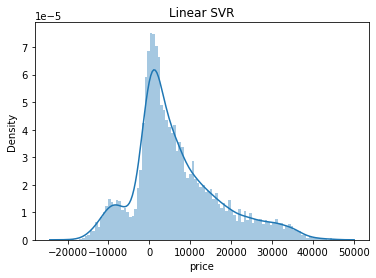

In [99]:
# LinearSVR
pred_lsvr = lsvr.predict(X_test)

model_error(pred_lsvr)

sns.distplot((y_test-pred_lsvr),bins=100)
plt.title('Linear SVR')

R2 Score: 0.4353181194244664
MAE: 6466.142421689705
RMSE: 9316.603783677707


Text(0.5, 1.0, 'RidgeCV')

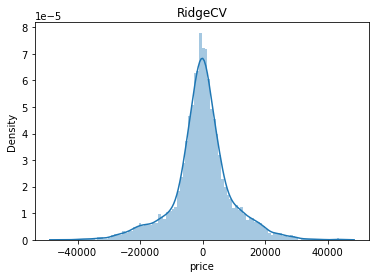

In [100]:
# RidgeCV
pred_rcv = rcv.predict(X_test)

model_error(pred_rcv)

sns.distplot((y_test-pred_rcv),bins=100)
plt.title('RidgeCV')

R2 Score: 0.12732167376028114
MAE: 7273.5549310055985
RMSE: 11581.979583271079


Text(0.5, 1.0, 'Decision Tree Regression')

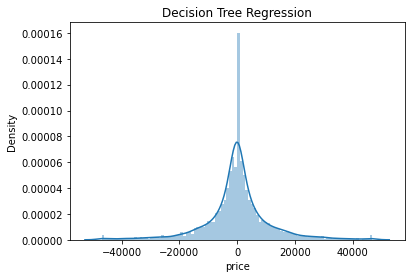

In [101]:
# DecisionTreeRegressor
pred_dtr = dtr.predict(X_test)

model_error(pred_dtr)

sns.distplot((y_test-pred_dtr),bins=100)
plt.title('Decision Tree Regression')

R2 Score: 0.5238720090404834
MAE: 5658.317821464594
RMSE: 8554.95160197541


Text(0.5, 1.0, 'Random Forest Regression')

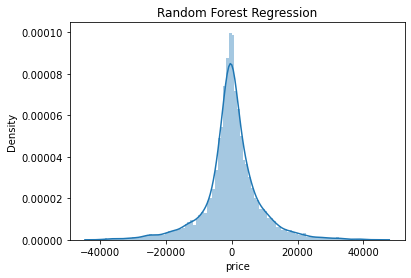

In [102]:
# RandomForestRegressor

pred_rfr = rfr.predict(X_test)

model_error(pred_rfr)

sns.distplot((y_test-pred_rfr),bins=100)
plt.title('Random Forest Regression')

R2 Score: 0.4356099038790253
MAE: 6444.558322369365
RMSE: 9314.196418125357


Text(0.5, 1.0, 'MLPRegressor')

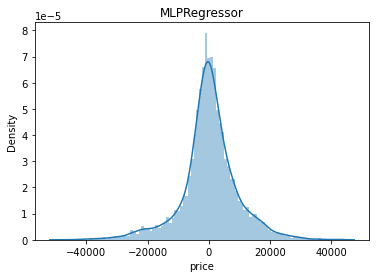

In [103]:
# MLPRegressor
pred_mlpr = mlpr.predict(X_test)

model_error(pred_mlpr)

sns.distplot((y_test-pred_mlpr),bins=100)
plt.title('MLPRegressor')

R2 Score: 0.5238834800544302
MAE: 5691.580966213307
RMSE: 8554.848547164436


Text(0.5, 1.0, 'LGBM')

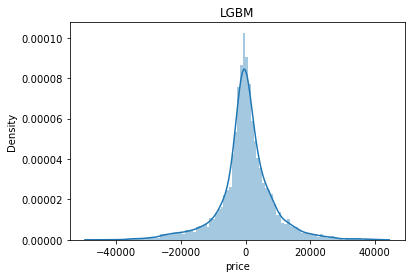

In [104]:
# lightgbm
pred_lg = lg.predict(X_test)

model_error(pred_lg)

sns.distplot((y_test-pred_lg),bins=100)
plt.title('LGBM')

R2 Score: 0.5027088999415807
MAE: 5896.327265860186
RMSE: 8743.01137499371


Text(0.5, 1.0, 'GradientBoost')

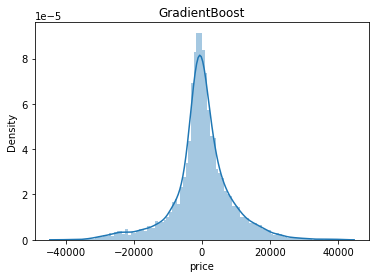

In [105]:
# GradientBoost
pred_gbr = gbr.predict(X_test)

model_error(pred_gbr)

sns.distplot((y_test-pred_gbr),bins=100)
plt.title('GradientBoost')

R2 Score: 0.5234822442757071
MAE: 5678.902484814589
RMSE: 8558.452484764606


Text(0.5, 1.0, 'XGBoosting')

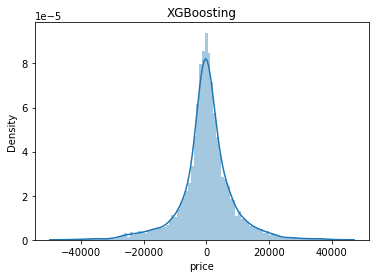

In [106]:
# xgboost
pred_xgb = xgb.predict(X_test)

model_error(pred_xgb)

sns.distplot((y_test-pred_xgb),bins=100)
plt.title('XGBoosting')

We can see that some algorithms work very well.

Try to search the best parameters of decision tree and linear svc.

In [107]:
from sklearn.model_selection import GridSearchCV

tree_para = {'max_depth':[3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90],
             'min_samples_leaf':[2,3,5,7,9,10],'min_impurity_decrease':[0.1,0.2,0.3,0.5]}

dtr_search = GridSearchCV(dtr,tree_para,cv=5)

dtr_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,
                                       30, 40, 50, 70, 90],
                         'min_impurity_decrease': [0.1, 0.2, 0.3, 0.5],
                         'min_samples_leaf': [2, 3, 5, 7, 9, 10]})

In [108]:
dtr_search.best_params_

{'max_depth': 9, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 9}

R2 Score: 0.44811042186330907
MAE: 6200.474734311866
RMSE: 9210.4700883911


Text(0.5, 1.0, 'Decision Tree Regression')

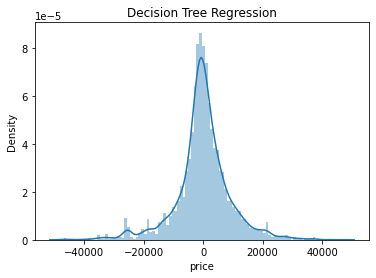

In [109]:
# DecisionTreeRegressor with the best parameters
pred_dtr_best = dtr_search.predict(X_test)

model_error(pred_dtr_best)

sns.distplot((y_test-pred_dtr_best),bins=100)
plt.title('Decision Tree Regression')

In [110]:
lsvr_para = {'C':[0.1,0.5,1,2,5,10],'intercept_scaling':[0.1,0.2,0.5,1,2,5,10]}

lsvr_search = GridSearchCV(lsvr,lsvr_para,cv=5)

lsvr_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'C': [0.1, 0.5, 1, 2, 5, 10],
                         'intercept_scaling': [0.1, 0.2, 0.5, 1, 2, 5, 10]})

In [111]:
dtr_search.best_params_

{'max_depth': 9, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 9}

R2 Score: 0.42510653489960626
MAE: 6383.437175944142
RMSE: 9400.466065588558


Text(0.5, 1.0, 'Linear SVC')

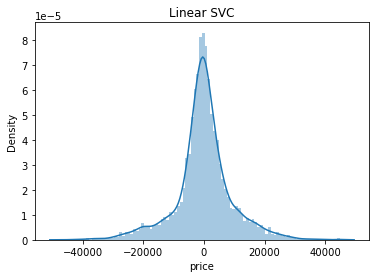

In [112]:
# Linear SVC with the best parameters
pred_lsvr_best = lsvr_search.predict(X_test)

model_error(pred_lsvr_best)

sns.distplot((y_test-pred_lsvr_best),bins=100)
plt.title('Linear SVC')

We can see that these two models work much better than before.